In [54]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

In [55]:
weekly_returns = pd.read_parquet(path=r"funnel\financial_data\all_etfs_rets.parquet.gzip")

In [56]:
weekly_returns.columns

MultiIndex([('DK0016111511',          'Wealth Invest Amalie Global AK'),
            ('DK0060821064',              'BankInvest Danske Aktier W'),
            ('DK0016112832',       'BankInvest Emerging Markets Obl A'),
            ('DK0060019552',   'BankInvest Emerging Markets Obl Akk A'),
            ('DK0060822112', 'BankInvest Em Markets Obl Lokalvaluta W'),
            ('DK0060823193',   'BankInvest Emerging Markets Obl Akk W'),
            ('DK0016060346',              'BankInvest Danske Aktier A'),
            ('DK0060012037', 'BankInvest Em Markets Obl Lokalvaluta A'),
            ('DK0016026750',              'BankInvest Almen Bolig udb'),
            ('DK0060822039',       'BankInvest Emerging Markets Obl W'),
            ...
            ('DK0061545654',    'Nordea Invest Stabil Balanceret KL 2'),
            ('DK0061542206',              'Nordea Invest Basis 3 KL 2'),
            ('DK0061544681',        'Nordea Invest HøjrenteLande KL 2'),
            ('DK0061541828',       

In [57]:
names = weekly_returns.columns.get_level_values(1)
# Set the columns to be only the first part of the tuple (the ISIN)
weekly_returns.columns = weekly_returns.columns.get_level_values(0)
# create dictionary using the ISIN as key and the name as value. 
isin_dict = dict(zip(weekly_returns.columns, names))
# Map the existing columns to their corresponding ISIN names
weekly_returns.columns = weekly_returns.columns.map(isin_dict)

In [58]:
weekly_returns_og_return = weekly_returns.copy()
weekly_returns_og_risk = weekly_returns.copy()

In [59]:
weekly_returns

,Wealth Invest Amalie Global AK,BankInvest Danske Aktier W,BankInvest Emerging Markets Obl A,BankInvest Emerging Markets Obl Akk A,BankInvest Em Markets Obl Lokalvaluta W,BankInvest Emerging Markets Obl Akk W,BankInvest Danske Aktier A,BankInvest Em Markets Obl Lokalvaluta A,BankInvest Almen Bolig udb,BankInvest Emerging Markets Obl W,...,Nordea Invest Stabil Balanceret KL 2,Nordea Invest Basis 3 KL 2,Nordea Invest HøjrenteLande KL 2,Nordea Invest Aktier KL 2,Nordea Invest Aktier II KL 2,Nordea Invest European Sm Cap Stars KL2,Nordea Invest Emerging Markets KL 2,Nordea Invest Stabile Aktier Akk KL 2,Nordea Invest Basis 4 KL 2,Nordea Invest European Stars KL 2
2013-01-09 00:00:00+00:00,0.013074,0.014113,0.001879,0.002769,0.011412,0.002769,0.014113,0.011412,0.001283,0.001879,...,0.009270,0.013735,0.000869,0.015835,0.015204,0.008671,0.013532,0.013222,0.012706,-0.002460
2013-01-16 00:00:00+00:00,-0.011245,0.000155,0.000134,0.000132,-0.017181,0.000132,0.000155,-0.017181,-0.000296,0.000134,...,-0.000810,-0.004976,-0.000395,-0.005092,-0.005133,-0.007494,-0.018481,0.006167,-0.004347,0.000260
2013-01-23 00:00:00+00:00,0.009563,0.012987,0.002143,0.001775,-0.001826,0.001775,0.012987,-0.001826,-0.001479,0.002143,...,0.004506,0.006847,0.000869,0.010865,0.010286,0.016489,0.010520,0.008883,0.006648,0.008304
2013-01-30 00:00:00+00:00,-0.008705,0.005342,-0.006283,-0.006300,-0.018123,-0.006300,0.005342,-0.018123,-0.003160,-0.006283,...,-0.003858,-0.007182,-0.007656,-0.006932,-0.006755,-0.009940,-0.024998,0.011799,-0.003746,-0.010423
2013-02-06 00:00:00+00:00,-0.001420,0.001366,-0.008340,-0.008453,0.005413,-0.008453,0.001366,0.005413,0.001090,-0.008340,...,-0.002342,-0.003232,-0.011215,-0.000392,-0.000390,-0.001269,0.001224,-0.003655,-0.004947,-0.008843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,-0.001854,0.008015,-0.001367,-0.001477,0.006608,-0.001392,0.008021,0.006486,0.000103,-0.001344,...,0.001289,0.001670,-0.001061,0.003621,0.003511,-0.002326,-0.004054,0.009702,0.002234,0.000505
2024-07-03 00:00:00+00:00,-0.000531,-0.003893,-0.001369,-0.001420,-0.007758,-0.001394,-0.003979,-0.007753,0.000620,-0.001154,...,-0.013037,-0.001608,-0.005212,-0.000442,-0.000557,0.009080,0.018598,-0.010389,-0.001688,0.006464
2024-07-10 00:00:00+00:00,0.009450,0.001414,0.006656,0.006934,0.017642,0.006980,0.001248,0.017656,0.002064,0.006546,...,-0.003262,0.003400,0.009217,0.004715,0.004712,0.001034,0.012540,0.000583,0.003653,0.004917
2024-07-17 00:00:00+00:00,-0.008520,-0.030308,0.004862,0.004944,-0.001478,0.004967,-0.030421,-0.001695,0.003090,0.004973,...,0.019143,0.001784,0.005480,-0.001320,-0.001321,0.015185,-0.013541,0.021911,0.000876,-0.003495


In [60]:
# List of entities to filter
entities_to_filter = ["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"]

In [61]:
# weekly returns 3y, 5y, 10y
weekly_returns_all_funds_3y = weekly_returns.loc['2021-07-21':'2024-07-24']
weekly_returns_all_funds_5y = weekly_returns.loc['2019-07-24':'2024-07-24']
weekly_returns_all_funds_10y = weekly_returns.loc['2014-07-23':'2024-07-24']
# filter. Only keep the ones that are not in entities to filter
weekly_returns_all_funds_3y = weekly_returns_all_funds_3y.loc[:, ~weekly_returns_all_funds_3y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_5y = weekly_returns_all_funds_5y.loc[:, ~weekly_returns_all_funds_5y.columns.isin(entities_to_filter)]
weekly_returns_all_funds_10y = weekly_returns_all_funds_10y.loc[:, ~weekly_returns_all_funds_10y.columns.isin(entities_to_filter)]
# annualized returns 3y, 5y, 10y
cumulative_return_all_funds_3y = (1 + weekly_returns_all_funds_3y).prod() - 1
annualized_returns_3y = (1 + cumulative_return_all_funds_3y)**(1/3) - 1
cumulative_return_all_funds_5y = (1 + weekly_returns_all_funds_5y).prod() - 1
annualized_returns_5y = (1 + cumulative_return_all_funds_5y)**(1/5) - 1
cumulative_return_all_funds_10y = (1 + weekly_returns_all_funds_10y).prod() - 1
annualized_returns_10y = (1 + cumulative_return_all_funds_10y)**(1/10) - 1

# annualized standard deviation 3y, 5y, 10y
annualized_std_3y = weekly_returns_all_funds_3y.std() * np.sqrt(52)
annualized_std_5y = weekly_returns_all_funds_5y.std() * np.sqrt(52)
annualized_std_10y = weekly_returns_all_funds_10y.std() * np.sqrt(52)

In [62]:
weekly_returns = weekly_returns[entities_to_filter]

In [63]:
# Portfolio value
portfolio_value = 158*317.08 + 1339*186.72 + 633*237.06 + 1009*198.17 + 315*317.27 + 3046*82.07
print(portfolio_value)

1000054.5


In [64]:
# Amount dataframe that shows Shares owned of each ETF
amount = pd.DataFrame(data=[158, 1339, 633, 1009, 315, 3046], 
                      index=["Sydinvest Global EM Equities B EUR Acc",
                      "Sydinvest Europa Value A DKK",
                        "Sydinvest Virksomhedsobl HY A DKK", 
                      "Sydinvest Korte Obligationer A DKK", 
                      "Sydinvest Fjernøsten A DKK Akk", 
                      "Sydinvest USA Value A DKK"], columns=["Amount"])

In [65]:
amount

,Amount
Sydinvest Global EM Equities B EUR Acc,158
Sydinvest Europa Value A DKK,1339
Sydinvest Virksomhedsobl HY A DKK,633
Sydinvest Korte Obligationer A DKK,1009
Sydinvest Fjernøsten A DKK Akk,315
Sydinvest USA Value A DKK,3046


In [66]:
# Price on July 1st, 2024
price_today = pd.DataFrame(data=[317.08, 186.72, 237.06, 198.17, 317.27, 82.07], 
                           index=["Sydinvest Global EM Equities B EUR Acc",
                                  "Sydinvest Europa Value A DKK",
                                  "Sydinvest Virksomhedsobl HY A DKK", 
                                  "Sydinvest Korte Obligationer A DKK", 
                                  "Sydinvest Fjernøsten A DKK Akk", 
                                  "Sydinvest USA Value A DKK"], 
                           columns=["Price"])

# Initialize weekly prices DataFrame
weekly_prices = pd.DataFrame(index=weekly_returns.index, columns=weekly_returns.columns)
weekly_prices.loc[weekly_prices.index[-1]] = price_today['Price']

# Backtrace the prices using the returns
for i in range(len(weekly_returns) - 2, -1, -1):
    weekly_prices.iloc[i] = weekly_prices.iloc[i + 1] / (1 + weekly_returns.iloc[i + 1])

weekly_prices = weekly_prices[::-1]  # Reorder for chronological order
# reindex the weekly prices to match the weekly returns
weekly_prices = weekly_prices.reindex(weekly_returns.index)

In [67]:
# Calculate the value of the portfolio by multiplying the amount of shares with the weekly prices for each fund
# create a dataframe with dates as index and the value of the portfolio as the only column

portfolio_value = np.dot(weekly_prices, amount)
portfolio_value = pd.DataFrame(portfolio_value, index=weekly_returns.index, columns=['Portfolio Value'])
portfolio_value

,Portfolio Value
2013-01-09 00:00:00+00:00,585175.525693
2013-01-16 00:00:00+00:00,582432.754797
2013-01-23 00:00:00+00:00,584628.760766
2013-01-30 00:00:00+00:00,582886.767316
2013-02-06 00:00:00+00:00,579623.616731
...,...
2024-06-26 00:00:00+00:00,996782.039991
2024-07-03 00:00:00+00:00,998520.128335
2024-07-10 00:00:00+00:00,1001061.411432
2024-07-17 00:00:00+00:00,1008771.160833


In [68]:
# portfolio_returns
portfolio_returns = portfolio_value.pct_change()
# change the name of the column to Portfolio Returns
portfolio_returns.columns = ['Portfolio Returns']

____________________________________

## Grandparents Portfolio

In [69]:
portfolio_returns_1824 = portfolio_returns.loc['2018-01-17':'2024-07-24']

In [70]:
portfolio_returns_1824_new = portfolio_returns_1824.groupby(np.arange(len(portfolio_returns_1824)) // 4).apply(lambda x: (1 + x).prod() - 1)   
portfolio_returns_1824_new.index = portfolio_returns_1824.groupby(np.arange(len(portfolio_returns_1824)) // 4).apply(lambda x: x.index[-1])

In [71]:
# result = result ** (1 / float(len(data.index) / 52)) - 1
# result = 1
# for i in range(len(data.index)):
#     result *= 1 + data.iloc[i, :]

In [72]:
# annualized portfolio return
cumulative_return_portfolio_1824 = (1 + portfolio_returns_1824_new).prod() - 1
portfolio_returns_1824_annual = (1 + cumulative_return_portfolio_1824)**(1/6.5) - 1

# annualized portfolio std
portfolio_returns_1824_std = portfolio_returns_1824.std() * np.sqrt(12)

In [73]:
portfolio_returns_1824_annual * 100

Portfolio Returns    3.498365
dtype: float64

In [74]:
portfolio_returns_1824_std * 100

Portfolio Returns    4.848565
dtype: float64

### Allocation Plot for Rebalancing Regret Portfolio

In [75]:
# upload excel file ChosenAllocation_RegretBalancing.xlsx sheet 1
path = r"C:\Users\nicol\OneDrive - Danmarks Tekniske Universitet\DTU\Masters\Practical Financial Optimization"
allocation_file = "ChosenAllocation_RegretBalancing.xls"
allocation = pd.read_excel(os.path.join(path, allocation_file), sheet_name=0)

In [76]:
# unnamed is month, so set as index and rename as Month
allocation = allocation.set_index('Unnamed: 0')
allocation.index.name = 'Month'
# replace NaN with 0
allocation = allocation.fillna(0)

In [77]:
# normalize to sum to 100 for every row
allocation = allocation.div(allocation.sum(axis=1), axis=0) * 100

In [78]:
# exchange the ISIN with the names using previous mapping
allocation.columns = allocation.columns.map(isin_dict)

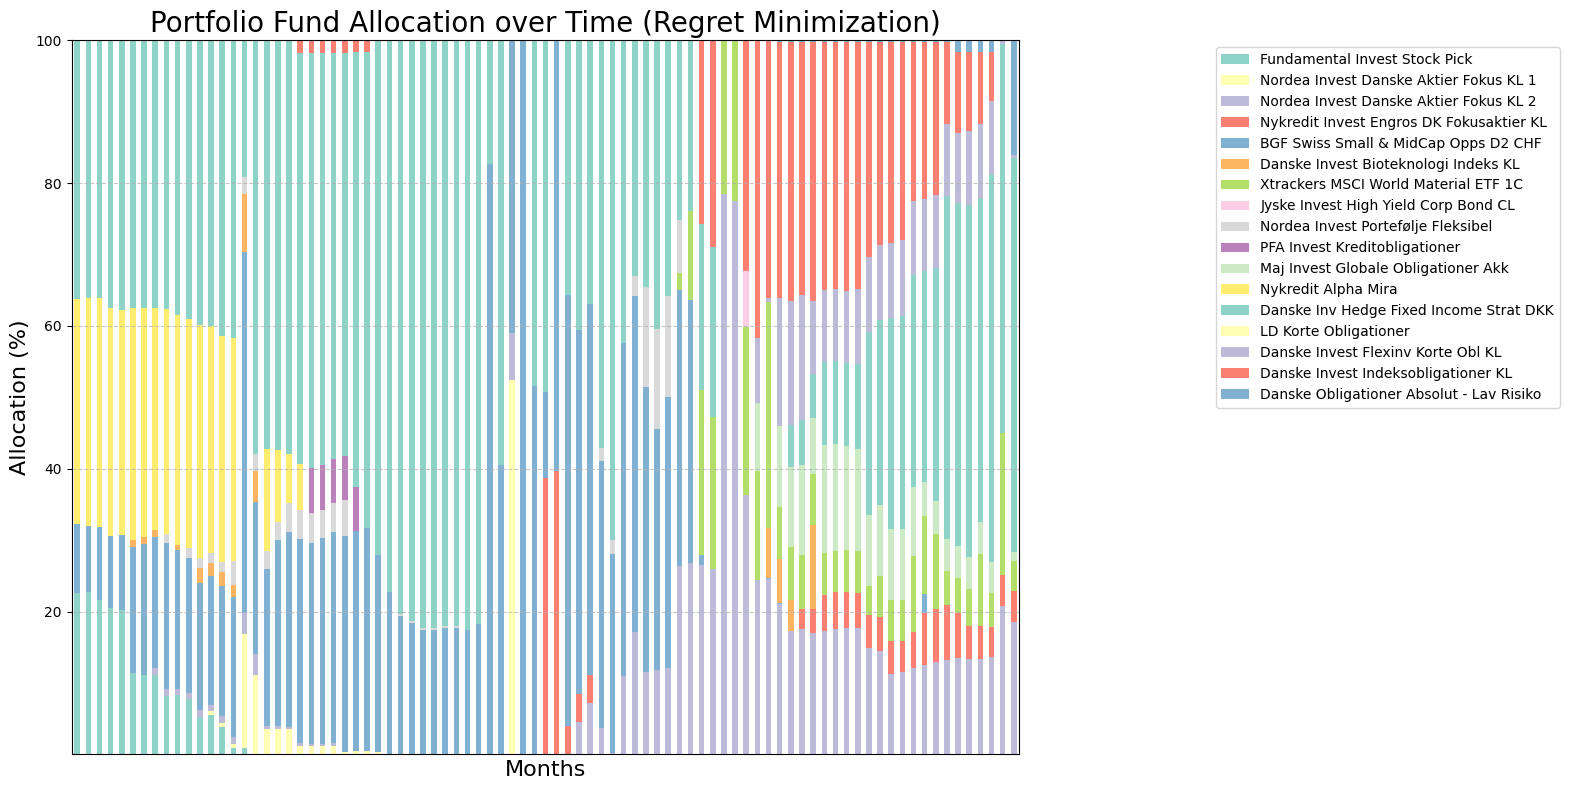

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a color palette that is easy to distinguish
palette = sns.color_palette("Set3", n_colors=len(allocation.columns))

# Create the bar plot with the correct figsize and stacked
allocation.plot(kind='bar', stacked=True, color=palette, figsize=(20, 8))

# Set title and labels
plt.title('Portfolio Fund Allocation over Time (Regret Minimization)', fontsize=20)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Allocation (%)', fontsize=16)

# Remove x-axis tick labels
plt.xticks([], fontsize=12)

# Add gridlines for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot, make it smaller, and further away
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=10)

# Adjust the layout to give more space to the plot area
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


In [80]:
# upload excel file ChosenAllocation_RegretBalancing.xlsx sheet 1
path_cvar = r"C:\Users\nicol\OneDrive - Danmarks Tekniske Universitet\DTU\Masters\Practical Financial Optimization"
allocation_file_cvar = "ChosenAllocation_CVaR_rebalancing.xls"
allocation_cvar = pd.read_excel(os.path.join(path_cvar, allocation_file_cvar), sheet_name=0)

In [81]:
# unnamed is month, so set as index and rename as Month
allocation_cvar = allocation_cvar.set_index('Unnamed: 0')
allocation_cvar.index.name = 'Month'
# replace NaN with 0
allocation_cvar = allocation_cvar.fillna(0)

In [82]:
# normalize to sum to 100 for every row
allocation_cvar = allocation_cvar.div(allocation_cvar.sum(axis=1), axis=0) * 100

In [83]:
# exchange the ISIN with the names using previous mapping
allocation_cvar.columns = allocation_cvar.columns.map(isin_dict)

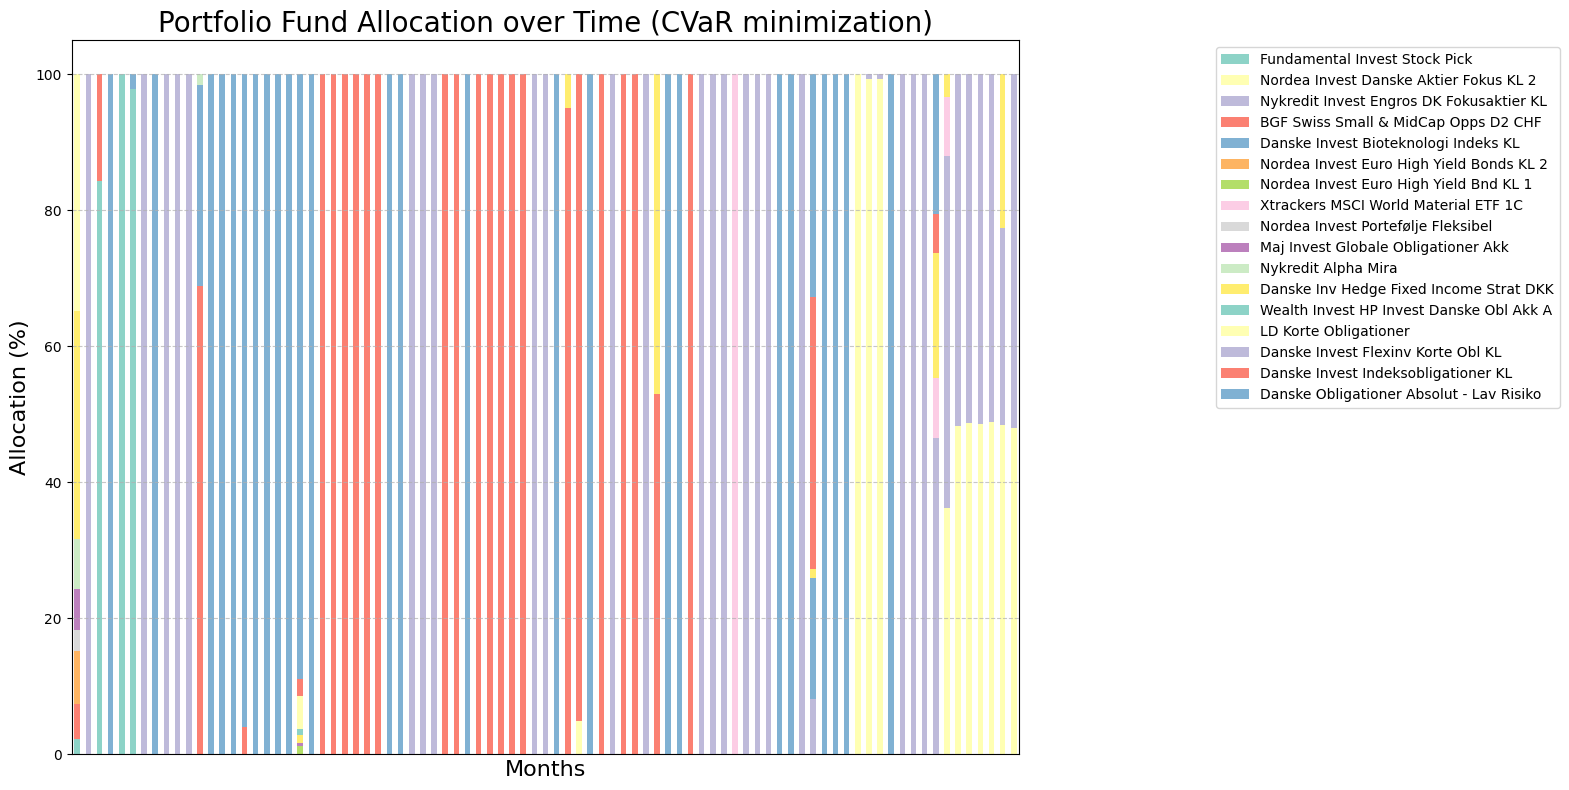

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a color palette that is easy to distinguish
palette_new = sns.color_palette("Set3", n_colors=len(allocation_cvar.columns))

# Create the bar plot with the correct figsize and stacked
allocation_cvar.plot(kind='bar', stacked=True, color=palette_new, figsize=(20, 8))

# Set title and labels
plt.title('Portfolio Fund Allocation over Time (CVaR minimization)', fontsize=20)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Allocation (%)', fontsize=16)

# Remove x-axis tick labels
plt.xticks([], fontsize=12)

# Add gridlines for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot, make it smaller, and further away
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=10)

# Adjust the layout to give more space to the plot area
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


### Comparing the actual performance of both funds

In [85]:
# upload excel file ChosenAllocation_RegretBalancing.xlsx sheet 1
regret_portfolio_file = "PortfolioValue_RegretBalancing.xls"
minregret_value = pd.read_excel(os.path.join(path, regret_portfolio_file), sheet_name=0)
cvar_portfolio_file = "PortfolioValue_CVaRBalancing.xls"
mincvar_value = pd.read_excel(os.path.join(path, cvar_portfolio_file), sheet_name=0)

In [86]:
# start from 2018-02-07
grandparents = portfolio_returns_1824.loc['2018-02-07':]
grandparents_monthly = grandparents.groupby(np.arange(len(grandparents)) // 4).apply(lambda x: (1 + x).prod() - 1)
grandparents_monthly.index = grandparents.groupby(np.arange(len(grandparents)) // 4).apply(lambda x: x.index[-1])

In [87]:
grandparents_monthly

,Portfolio Returns
2018-02-28 00:00:00+00:00,-0.015272
2018-03-28 00:00:00+00:00,-0.020263
2018-04-25 00:00:00+00:00,0.012283
2018-05-23 00:00:00+00:00,0.023151
2018-06-20 00:00:00+00:00,-0.003789
...,...
2024-04-17 00:00:00+00:00,0.000867
2024-05-15 00:00:00+00:00,0.033181
2024-06-12 00:00:00+00:00,-0.001102
2024-07-10 00:00:00+00:00,0.004495


In [88]:
# Fixed date for m0
m0_date = '2018-02-07'

# Create the mapping dictionary
m_mapping = {'m0': m0_date}
m_mapping.update({f'm{i+1}': grandparents_monthly.index[i].strftime('%Y-%m-%d') for i in range(len(grandparents_monthly))})

In [89]:
# use the mapping on cvar_var and minregret_value
minregret_value = minregret_value.rename(columns=m_mapping)
mincvar_value = mincvar_value.rename(columns=m_mapping)

In [90]:
portfolio_value_grandparents = minregret_value.copy()

In [91]:
# Calculate the portfolio values using returns
returns_series = grandparents_monthly['Portfolio Returns'].values
for i in range(1, len(portfolio_value_grandparents.columns)):
    prev_value = portfolio_value_grandparents.iloc[0, i - 1]  # Previous value
    returns = returns_series[i - 1]  # Returns for the current period
    portfolio_value_grandparents.iloc[0, i] = prev_value * (1 + returns)

In [92]:
# change all the month values in the three portfolios to datetime
portfolio_value_grandparents.columns = pd.to_datetime(portfolio_value_grandparents.columns)
mincvar_value.columns = pd.to_datetime(mincvar_value.columns)
minregret_value.columns = pd.to_datetime(minregret_value.columns)

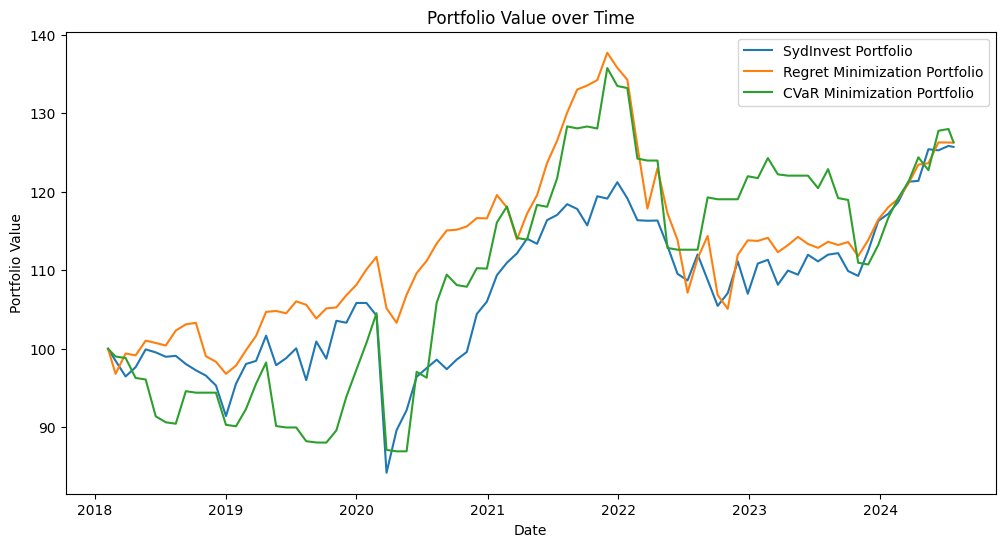

In [93]:
# in a plot together plot all 3 portfolios over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_grandparents.iloc[0], label='SydInvest Portfolio') 
plt.plot(minregret_value.iloc[0], label='Regret Minimization Portfolio')
plt.plot(mincvar_value.iloc[0], label='CVaR Minimization Portfolio')
plt.legend()
plt.title('Portfolio Value over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

### Allocation Plot for Rebalancing Regret Portfolio

In [94]:
# upload excel file ChosenAllocation_RegretBalancing.xlsx sheet 1
#path = r"C:\Users\nicol\OneDrive - Danmarks Tekniske Universitet\DTU\Masters\Practical Financial Optimization"
allocation_file = "ChosenAllocation_RegretBalancing.xls"
allocation = pd.read_excel(os.path.join(path, allocation_file), sheet_name=0)

In [95]:
# unnamed is month, so set as index and rename as Month
allocation = allocation.set_index('Unnamed: 0')
allocation.index.name = 'Month'
# replace NaN with 0
allocation = allocation.fillna(0)

In [96]:
# normalize to sum to 100 for every row
allocation = allocation.div(allocation.sum(axis=1), axis=0) * 100

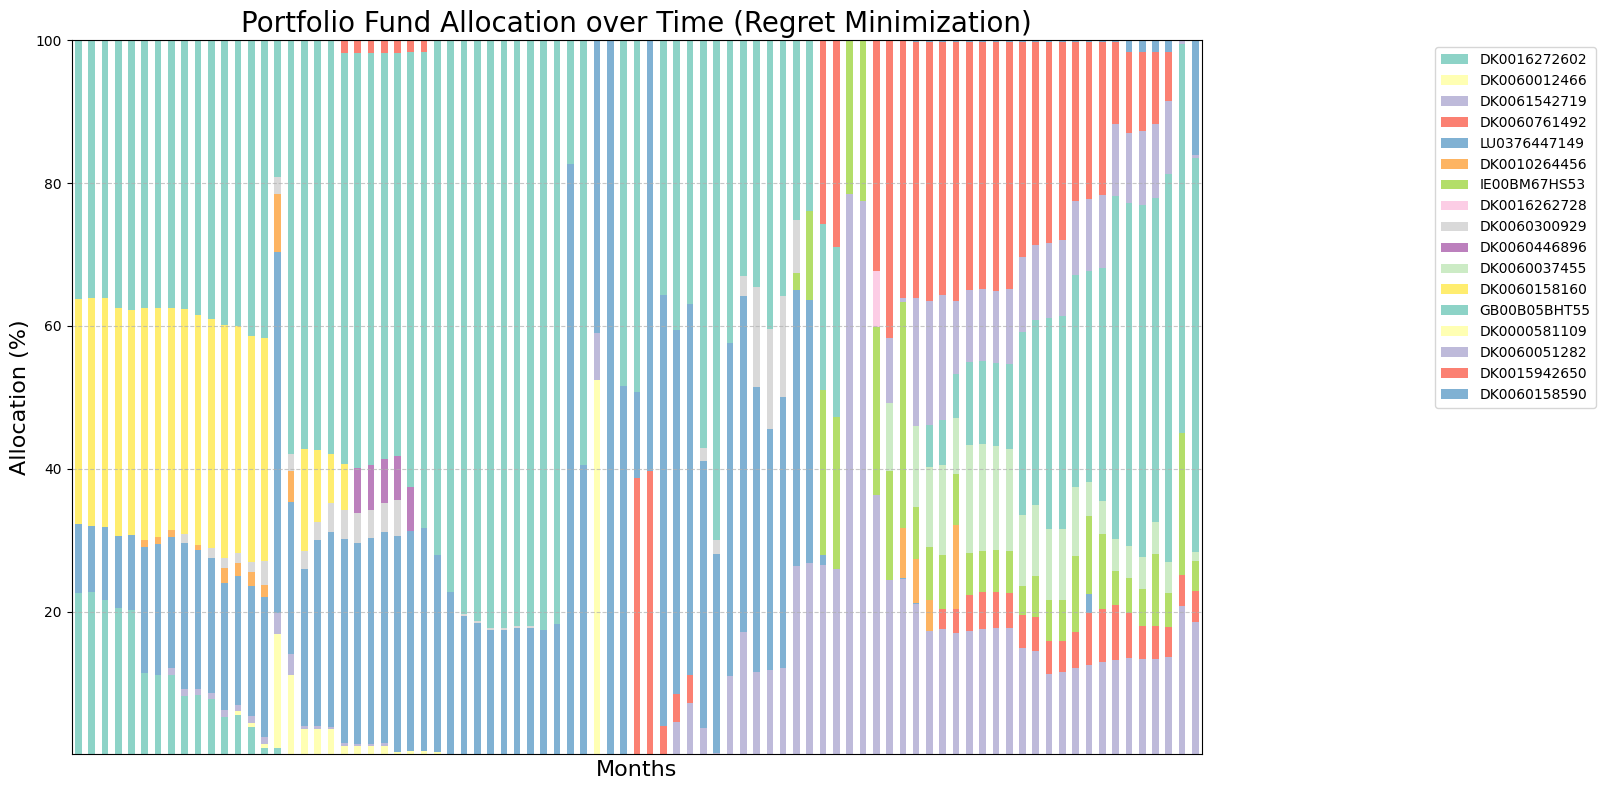

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a color palette that is easy to distinguish
palette = sns.color_palette("Set3", n_colors=len(allocation.columns))

# Create the bar plot with the correct figsize and stacked
allocation.plot(kind='bar', stacked=True, color=palette, figsize=(20, 8))

# Set title and labels
plt.title('Portfolio Fund Allocation over Time (Regret Minimization)', fontsize=20)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Allocation (%)', fontsize=16)

# Remove x-axis tick labels
plt.xticks([], fontsize=12)

# Add gridlines for y-axis to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot, make it smaller, and further away
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=10)

# Adjust the layout to give more space to the plot area
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


### Ex-Post Ante Min Regret

In [98]:
file = "expected_values.xls"
expected_values = pd.read_excel(os.path.join(path, file), sheet_name=0)

In [99]:
# unnamed is month, so set as index and rename as Month
expected_values = expected_values.set_index('Unnamed: 0')
expected_values.index.name = 'Month'

In [100]:
expected_values

,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,...,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85
Month,,,,,,,,,,,,,,,,,,,,,
Expected,100,101.106804,97.929428,100.465333,100.184875,101.959455,101.671654,101.402766,103.349494,104.146010,...,112.196835,114.404838,117.014732,118.631134,119.725334,121.677877,124.024011,124.341839,127.152876,127.014999
Actual,100,96.814722,99.402095,99.163321,101.039336,100.744471,100.417773,102.323839,103.113255,103.309087,...,113.839526,116.449796,118.036476,119.109822,121.021507,123.453297,123.628614,126.280768,126.266256,126.241457
Best,100,105.951867,108.724352,108.998024,109.513454,110.888159,109.237532,111.794586,112.685858,111.472710,...,126.864809,129.954228,131.249810,132.844869,132.823488,136.704850,135.146333,138.991330,143.568424,137.166419
Worst,100,89.607229,92.223029,92.841006,93.363375,93.768349,93.814406,94.999700,95.486321,96.563593,...,100.602485,101.837441,103.999378,104.521606,107.486529,110.257615,107.282822,111.695584,109.040009,111.168197


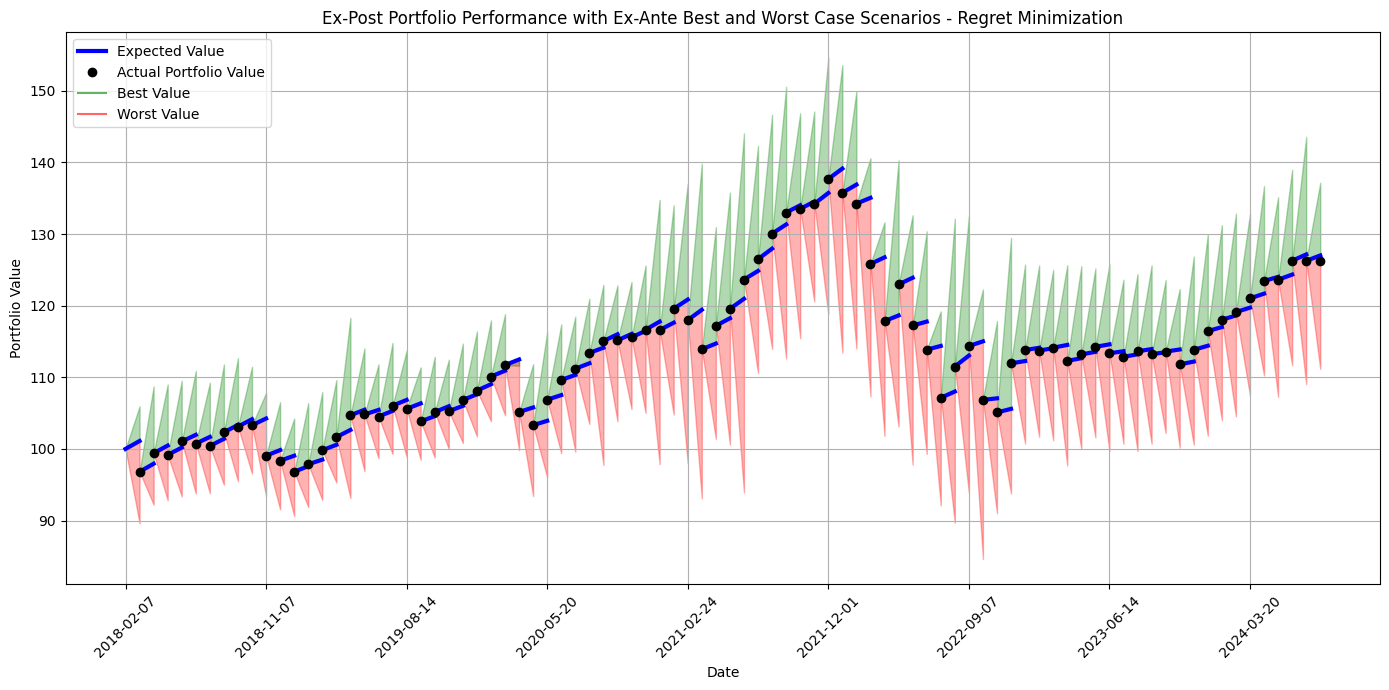

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Extract Data
expected = expected_values.loc['Expected']
actual = expected_values.loc['Actual']
best = expected_values.loc['Best']
worst = expected_values.loc['Worst']

# Initialize lists for plotting
months = expected.index
# Map the months to datetime using m_mapping
months = [m_mapping[month] for month in months]
x = np.arange(len(months))  # Numeric indices for plotting

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot shaded areas between best and worst cases and actual values
for i in range(len(months) - 1):
    # Fill between actual and best cases (green shade), stopping at the best value
    ax.fill_between([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], [actual.iloc[i], best.iloc[i+1]],
                    color='green', alpha=0.3)
    
    # Fill between actual and worst cases (red shade), stopping at the worst value
    ax.fill_between([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], [actual.iloc[i], worst.iloc[i+1]],
                    color='red', alpha=0.3)
    
    # Plot the expected values as a thick line
    ax.plot([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], 'b-', linewidth=3, label='Expected Value' if i == 0 else "")
    
    # Plot the actual values as dots (skipping the first dot)
    if i > 0:
        ax.plot(months[i], actual.iloc[i], 'ko')  # Actual value as a point

# Plot the last actual value as a dot
ax.plot(months[-1], actual.iloc[-1], 'ko')  # Actual value as a point

# Add dummy lines/dots for the legend
ax.plot([], [], 'ko', label='Actual Portfolio Value')  # Black dots for actual values
ax.plot([], [], color='green', alpha=0.6, label='Best Value')
ax.plot([], [], color='red', alpha=0.6, label='Worst Value')

# Add plot details
ax.legend(loc='upper left')
ax.set_title('Ex-Post Portfolio Performance with Ex-Ante Best and Worst Case Scenarios - Regret Minimization')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.grid(True)

# Set x-ticks to show only the years
ax.set_xticks(months[::10])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Ex-Post Ante Min CVaR

In [102]:
file = "CVaR_Ex_Post_Ante.xls"
expected_values = pd.read_excel(os.path.join(path, file), sheet_name=0)

# unnamed is month, so set as index and rename as Month
expected_values = expected_values.set_index('Unnamed: 0')
expected_values.index.name = 'Month'

In [103]:
expected_values

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85
Month,,,,,,,,,,,,,,,,,,,,,
ActualReturn,99.021260,98.823415,96.283497,96.091122,91.401582,90.641063,90.459962,94.601962,94.412947,94.412947,...,110.732351,113.211970,116.669164,119.223988,121.226329,124.385023,122.745064,127.759395,127.986600,126.303125
ExpectedReturn,99.499328,98.823415,98.122317,96.091122,92.793949,92.062091,90.459962,96.104243,94.412947,94.412947,...,110.732351,114.604361,117.480801,120.415912,122.435435,125.944127,123.863350,129.519851,129.211468,127.919707
WorstCaseReturn,95.801181,98.823415,83.721765,96.091122,78.746970,78.017616,90.459962,73.247148,94.412947,94.412947,...,110.732351,82.873692,98.332423,88.280265,94.194613,97.574987,90.812712,95.240144,104.281667,91.859789
BestCaseReturn,103.418230,98.823415,115.738732,96.091122,111.481956,107.168181,90.459962,122.939468,94.412947,94.412947,...,110.732351,133.570830,129.817387,143.020742,138.830669,147.146035,141.226542,145.537413,150.292342,145.461097


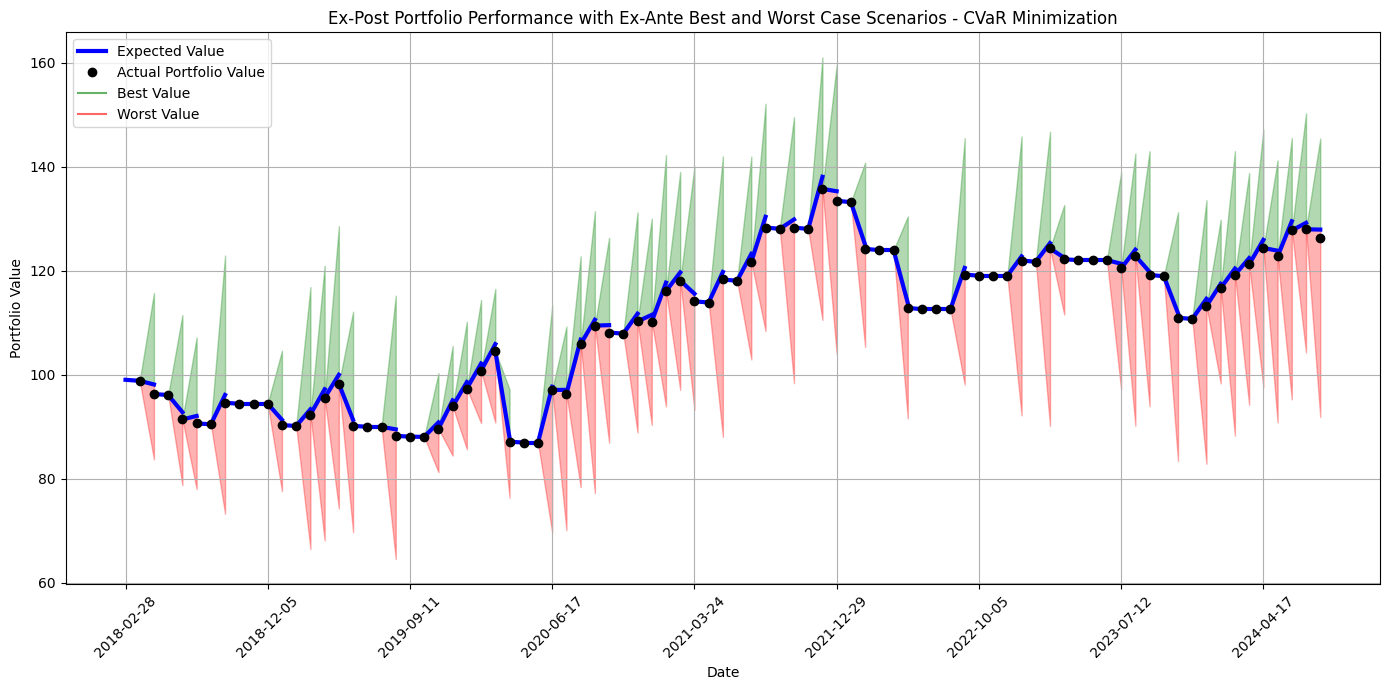

In [104]:
# Extract Data
expected = expected_values.loc['ExpectedReturn']
actual = expected_values.loc['ActualReturn']
best = expected_values.loc['BestCaseReturn']
worst = expected_values.loc['WorstCaseReturn']

# Initialize lists for plotting
months = expected.index
# Map the months to datetime using m_mapping
months = [m_mapping[month] for month in months]
x = np.arange(len(months))  # Numeric indices for plotting

# Prepare the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot shaded areas between best and worst cases and actual values
for i in range(len(months) - 1):
    # Fill between actual and best cases (green shade), stopping at the best value
    ax.fill_between([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], [actual.iloc[i], best.iloc[i+1]],
                    color='green', alpha=0.3)
    
    # Fill between actual and worst cases (red shade), stopping at the worst value
    ax.fill_between([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], [actual.iloc[i], worst.iloc[i+1]],
                    color='red', alpha=0.3)
    
    # Plot the expected values as a thick line
    ax.plot([months[i], months[i+1]], [actual.iloc[i], expected.iloc[i+1]], 'b-', linewidth=3, label='Expected Value' if i == 0 else "")

    # Plot the actual values as dots (skipping the first dot)
    if i > 0:
        ax.plot(months[i], actual.iloc[i], 'ko')  # Actual value as a point

# Plot the last actual value as a dot
ax.plot(months[-1], actual.iloc[-1], 'ko')  # Actual value as a point

# Add dummy lines/dots for the legend
ax.plot([], [], 'ko', label='Actual Portfolio Value')  # Black dots for actual values
ax.plot([], [], color='green', alpha=0.6, label='Best Value')
ax.plot([], [], color='red', alpha=0.6, label='Worst Value')

# Add plot details
ax.legend(loc='upper left')
ax.set_title('Ex-Post Portfolio Performance with Ex-Ante Best and Worst Case Scenarios - CVaR Minimization')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.grid(True)

# Set x-ticks to show only the years
ax.set_xticks(months[::10])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
